# Librerie 

In [1]:
from __future__ import division
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
from os import *
from os.path import isfile, join
import sys
import scipy as scipy
import requests as rqs
import random
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from matplotlib import gridspec
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tbats import TBATS, BATS
import seaborn as sns
#sns.set_theme(style="whitegrid")
from statsmodels.tsa.stattools import grangercausalitytests
from IPython.display import display

plt.rcParams["figure.figsize"] = (16,9)
df = pd.read_csv('energia_cleaned_v6_fill.csv', parse_dates=['dataora'], index_col='dataora') #media oraria fill
df2 = pd.read_csv('energia_cleaned_v4.csv', parse_dates=['dataora'], index_col='dataora') # media 15 min no fill(no giugno 2020)
df
# ### FILTRARE TRA DUE DATE ESATTE
# df['2019-04-01' : '2019-07-01']

# ### FILTRARE PER ANNO, MESE, ...
# df[df.index.year==2019]
# opzioni: year, month, day, hour, minute, dayofweek (lunedì è lo zero)

# ### GROUP BY PER GIORNO, MEDIANDO
# df.resample('D').mean()

#EXTRA
#df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

#df.sort_values(by='potenza_massima_u1', ascending=True)


,ora_legale,consumo_attiva_u1,consumo_reattiva_u1,potenza_massima_u1,consumo_attiva_u6,consumo_reattiva_u6,potenza_massima_u6
dataora,,,,,,,
2018-01-01 00:00:00,1.0,64.50,22.95,446.4,91.7125,36.4375,888.8
2018-01-01 01:00:00,1.0,64.35,23.25,446.4,91.1625,36.5750,888.8
2018-01-01 02:00:00,1.0,64.05,22.95,446.4,90.7500,36.4375,888.8
2018-01-01 03:00:00,1.0,63.60,22.80,446.4,93.5000,37.8125,888.8
2018-01-01 04:00:00,1.0,64.20,22.65,446.4,123.6125,51.7000,888.8
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.0,53.55,26.40,405.6,137.3625,55.9625,444.4
2020-12-31 20:00:00,1.0,54.15,27.15,405.6,138.0500,56.9250,444.4
2020-12-31 21:00:00,1.0,54.30,26.70,405.6,136.8125,55.2750,444.4


CONSUMI U1
83.41915239726028  --->Media consumo u1 2018
75.85551369863015  --->Media consumo u1 2019
71.14246926229508  --->Media consumo u1 2020
70.45294197766276  --->Media consumo u1 ora legale 1
81.37359693877549  --->Media consumo u1 ora legale 2
76.8005445939781  --->Media consumo u1 totale 
CONSUMI U6
131.55455336757993  --->Media consumo u6 2018
145.70672517123288  --->Media consumo u6 2019
113.94624874645366  --->Media consumo u6 2020
138.46598338327428  --->Media consumo u6 ora legale 1
124.57425997441449  --->Media consumo u6 ora legale 2
130.38749425900428  --->Media consumo u6 totale 


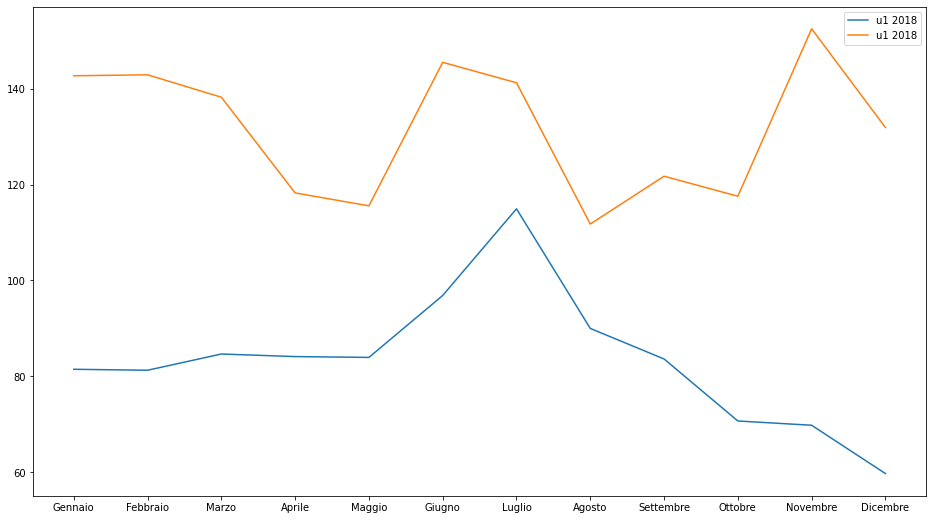

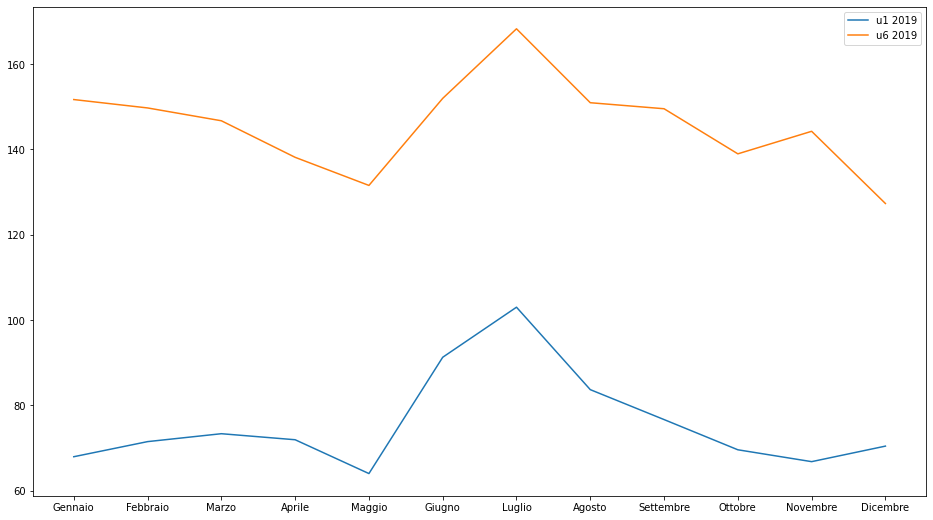

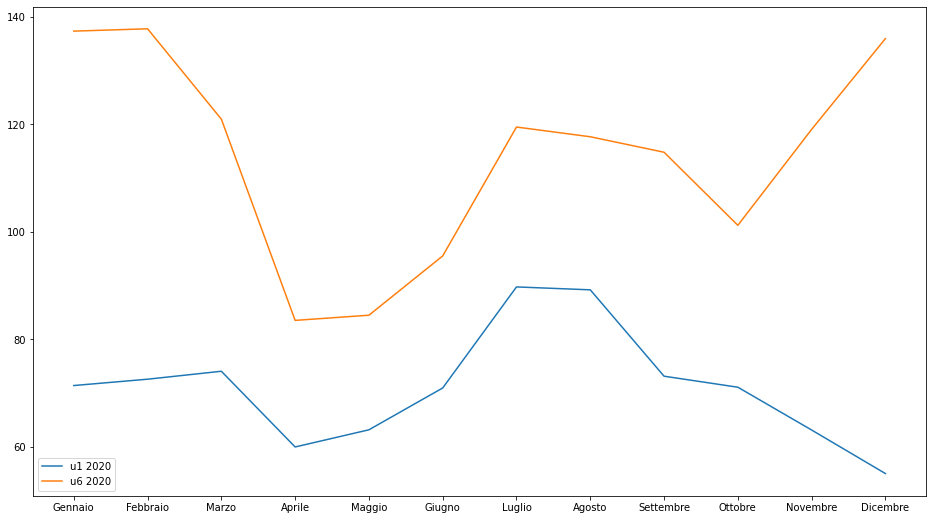

In [2]:
#UN PO' di DATI 

tmp1 = df[df['ora_legale']==1.0]
tmp2 = df[df['ora_legale']==2.0]
print("CONSUMI U1")
print(np.mean(df[df.index.year==2018]['consumo_attiva_u1'])," --->Media consumo u1 2018")
print(np.mean(df[df.index.year==2019]['consumo_attiva_u1'])," --->Media consumo u1 2019")
print(np.mean(df[df.index.year==2020]['consumo_attiva_u1'])," --->Media consumo u1 2020")
print(np.mean(tmp1['consumo_attiva_u1'])," --->Media consumo u1 ora legale 1")
print(np.mean(tmp2['consumo_attiva_u1'])," --->Media consumo u1 ora legale 2")
print(np.mean(df['consumo_attiva_u1']),  " --->Media consumo u1 totale ")
print("CONSUMI U6")
print(np.mean(df[df.index.year==2018]['consumo_attiva_u6'])," --->Media consumo u6 2018")
print(np.mean(df[df.index.year==2019]['consumo_attiva_u6'])," --->Media consumo u6 2019")
print(np.mean(df[df.index.year==2020]['consumo_attiva_u6'])," --->Media consumo u6 2020")
print(np.mean(tmp1['consumo_attiva_u6'])," --->Media consumo u6 ora legale 1")
print(np.mean(tmp2['consumo_attiva_u6'])," --->Media consumo u6 ora legale 2")
print(np.mean(df['consumo_attiva_u6']),  " --->Media consumo u6 totale ")

#per guardare media di un determinato mese
df18= df[df.index.year==2018]
df19= df[df.index.year==2019]
df20= df[df.index.year==2020]
mesi = ["Gennaio","Febbraio","Marzo","Aprile","Maggio","Giugno","Luglio","Agosto","Settembre","Ottobre","Novembre","Dicembre"]
media_u1_18=[]
media_u6_18=[]
media_u1_19=[]
media_u6_19=[]
media_u1_20=[]
media_u6_20=[]
cont=1
while cont<=12:
    media_u1_18.append(np.mean(df18["consumo_attiva_u1"][df18.index.month==cont]))
    media_u6_18.append(np.mean(df18["consumo_attiva_u6"][df18.index.month==cont]))
    media_u1_19.append(np.mean(df19["consumo_attiva_u1"][df19.index.month==cont]))
    media_u6_19.append(np.mean(df19["consumo_attiva_u6"][df19.index.month==cont]))
    media_u1_20.append(np.mean(df20["consumo_attiva_u1"][df20.index.month==cont]))
    media_u6_20.append(np.mean(df20["consumo_attiva_u6"][df20.index.month==cont]))
    cont=cont+1


dataf18_u1 = pd.DataFrame(media_u1_18,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u1_2018"])  
dataf18_u6 = pd.DataFrame(media_u6_18,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u6_2018"]) 

dataf19_u1 = pd.DataFrame(media_u1_19,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u1_2019"])  
dataf19_u6 = pd.DataFrame(media_u6_19,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u6_2019"]) 

dataf20_u1 = pd.DataFrame(media_u1_20,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u1_2020"])  
dataf20_u6 = pd.DataFrame(media_u6_20,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media_u6_2020"]) 

plt.plot(dataf18_u1["media_u1_2018"],label="u1 2018")
plt.plot(dataf18_u6["media_u6_2018"],label="u1 2018")
plt.legend()
plt.show()
plt.plot(dataf19_u1["media_u1_2019"],label="u1 2019")
plt.plot(dataf19_u6["media_u6_2019"],label="u6 2019")
plt.legend()
plt.show()
plt.plot(dataf20_u1["media_u1_2020"],label="u1 2020")
plt.plot(dataf20_u6["media_u6_2020"],label="u6 2020")
plt.legend()
plt.show()
#y2=np.mean(df1["consumo_attiva_u6"][df1.index.month])
#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.show()

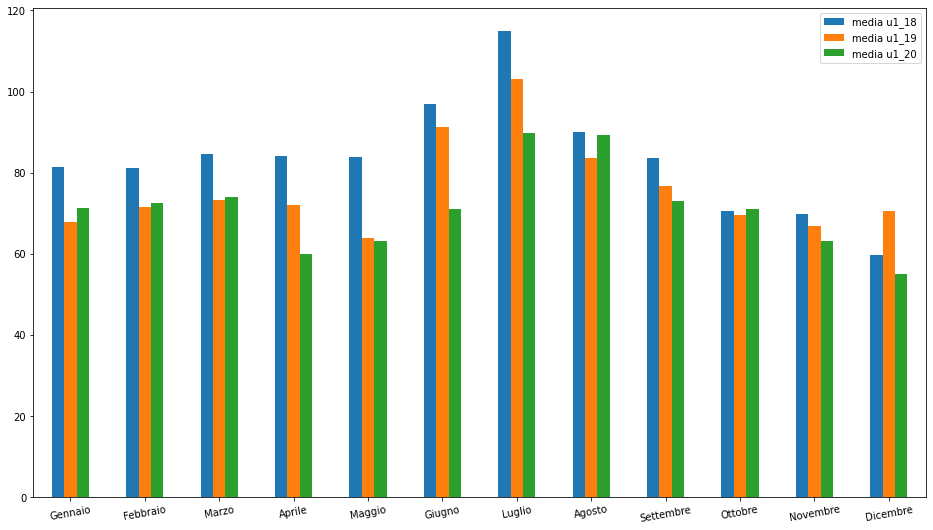

In [3]:



#dataf18_u1['media_u1_2018'].plot(kind='line', color='crimson',alpha=0.2,stacked=True)


#dataf19_u1['media_u1_2019'].plot(kind='bar', color='indigo',alpha=0.6,stacked=True)


#dataf20_u1['media_u1_2020'].plot(kind='bar', color='gold',alpha=0.5,stacked=True)
#plt.legend()

index = mesi

df_media_u1 = pd.DataFrame({'media u1_18': dataf18_u1['media_u1_2018'],
                   'media u1_19': dataf19_u1['media_u1_2019'],
                   'media u1_20': dataf20_u1['media_u1_2020']}, index=index)
ax = df_media_u1.plot.bar(rot=10,)

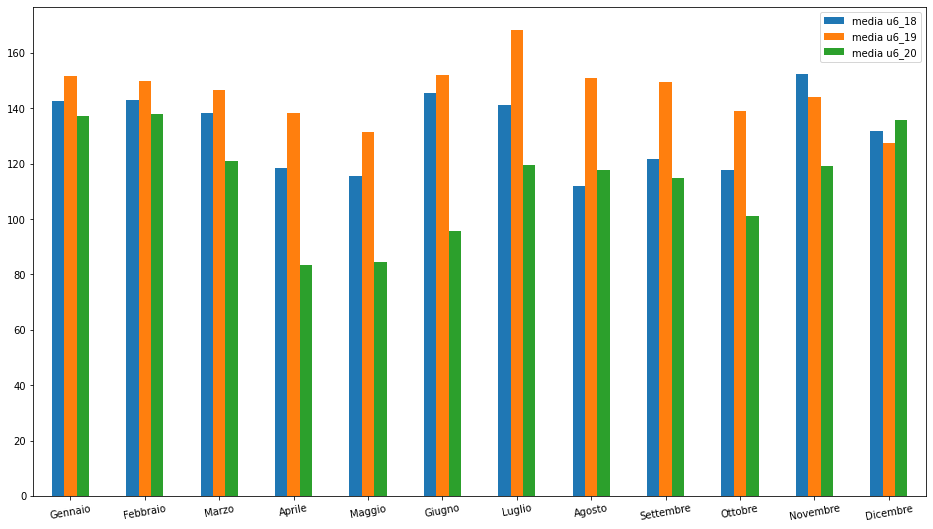

In [4]:
#dataf18_u6['media_u6_2018'].plot(kind='hist', color='crimson')
#dataf19_u6['media_u6_2019'].plot(kind='hist', color='indigo')
#dataf20_u6['media_u6_2020'].plot(kind='hist', color='gold')
#plt.legend()
index = mesi
df_media_u6 = pd.DataFrame({'media u6_18': dataf18_u6['media_u6_2018'],
                   'media u6_19': dataf19_u6['media_u6_2019'],
                   'media u6_20': dataf20_u6['media_u6_2020']}, index=index)
ax = df_media_u6.plot.bar(rot=10,)

In [5]:
#DIVIDO MEDIA ORARIA E CONFRONTO
raw_df = pd.read_csv('energia_cleaned_v6_fill.csv', parse_dates=['dataora'], index_col='dataora')
raw_df = raw_df[['consumo_attiva_u1', 'consumo_attiva_u6']]
raw_df_day = raw_df.resample('D').mean() #faccio media giornaliera
#raw_df = raw_df.dropna()
#raw_df_day = raw_df_day[~raw_df_day['consumo_attiva_u1'].isna()]#tolgo i valori NAN
#raw_df_hour = raw_df[~raw_df['consumo_attiva_u1'].isna()]#tolgo i valori NAN

#raw_df_day
D18=raw_df_day[raw_df_day.index.year==2018] #dataset 2018 con media giorno
D19=raw_df_day[raw_df_day.index.year==2019] #dataset 2019 con media giorno
D20=raw_df_day[raw_df_day.index.year==2020] #dataset 2020 con media giorno

#raw_df_hour
raw_df_hour = raw_df.resample('H').mean() #faccio media orario
H18=raw_df_hour[raw_df_hour.index.year==2018] #dataset 2018 con media oraria
H19=raw_df_hour[raw_df_hour.index.year==2019] #dataset 2019 con media oraria
H20=raw_df_hour[raw_df_hour.index.year==2020] #dataset 2020 con media oraria


print("Dataset con media giornaliera: \n")

print(D18 , "\n")

print("Dataset con media oraria: \n")
print(H18)

Dataset con media giornaliera: 

            consumo_attiva_u1  consumo_attiva_u6
dataora                                         
2018-01-01           64.30000         115.614583
2018-01-02           70.08125         129.731250
2018-01-03           75.38750         131.581771
2018-01-04           74.46250         131.444271
2018-01-05           75.86250         132.263542
...                       ...                ...
2018-12-27           29.60000          57.360417
2018-12-28           29.63750          75.630729
2018-12-29           41.58125         109.971354
2018-12-30           53.53750         125.388542
2018-12-31           53.95625         139.287500

[365 rows x 2 columns] 

Dataset con media oraria: 

                     consumo_attiva_u1  consumo_attiva_u6
dataora                                                  
2018-01-01 00:00:00              64.50            91.7125
2018-01-01 01:00:00              64.35            91.1625
2018-01-01 02:00:00              64.05      

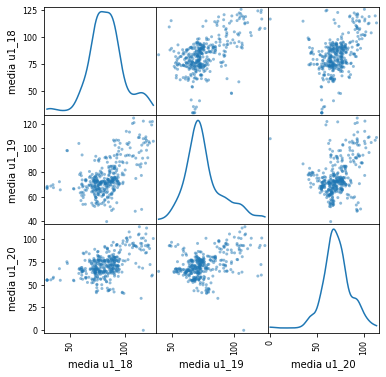

In [6]:
from pandas.plotting import scatter_matrix

#df_matrix = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

#scatter_matrix(D18["consumo_attiva_u1"], alpha=0.2, figsize=(6, 6), diagonal="kde");
D20_365=pd.concat([D20['2020-01-01' : '2020-02-28'],D20['2020-03-01' : '2020-12-31']])

df_media_u1_giorno = pd.DataFrame({'media u1_18': list(D18['consumo_attiva_u1']),
                   'media u1_19': list(D19['consumo_attiva_u1']),
                   'media u1_20': list(D20_365['consumo_attiva_u1'])})
#df_media_u1_giorno

scatter_matrix(df_media_u1_giorno, alpha=0.5, figsize=(6, 6), diagonal="kde");

c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

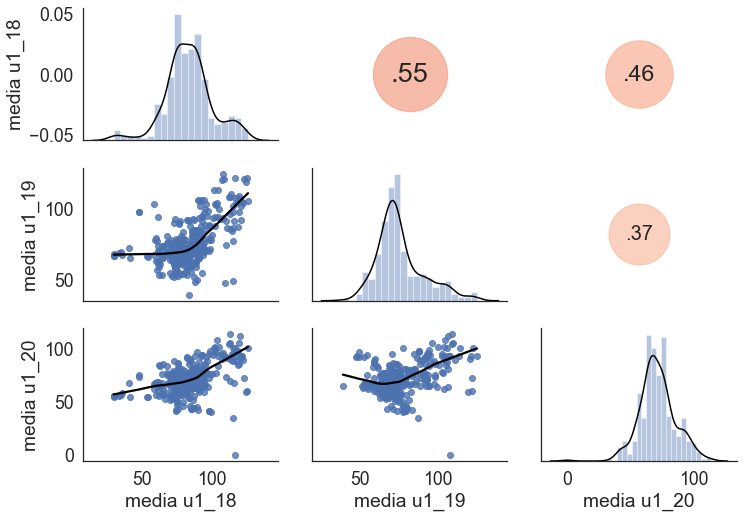

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
#iris = sns.load_dataset('iris')
g = sns.PairGrid(df_media_u1_giorno, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.savefig('correlogrammau1.svg', format='svg', bbox_inches='tight', dpi=1200)

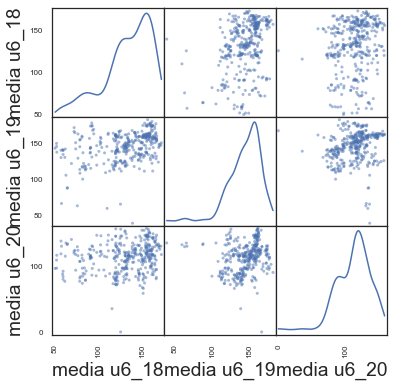

In [8]:
from pandas.plotting import scatter_matrix

#df_matrix = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

#scatter_matrix(D18["consumo_attiva_u1"], alpha=0.2, figsize=(6, 6), diagonal="kde");
D20_365=pd.concat([D20['2020-01-01' : '2020-02-28'],D20['2020-03-01' : '2020-12-31']])

df_media_u6_giorno = pd.DataFrame({'media u6_18': list(D18['consumo_attiva_u6']),
                   'media u6_19': list(D19['consumo_attiva_u6']),
                   'media u6_20': list(D20_365['consumo_attiva_u6'])})
#df_media_u1_giorno

scatter_matrix(df_media_u6_giorno, alpha=0.5, figsize=(6, 6), diagonal="kde");

c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\gisto\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

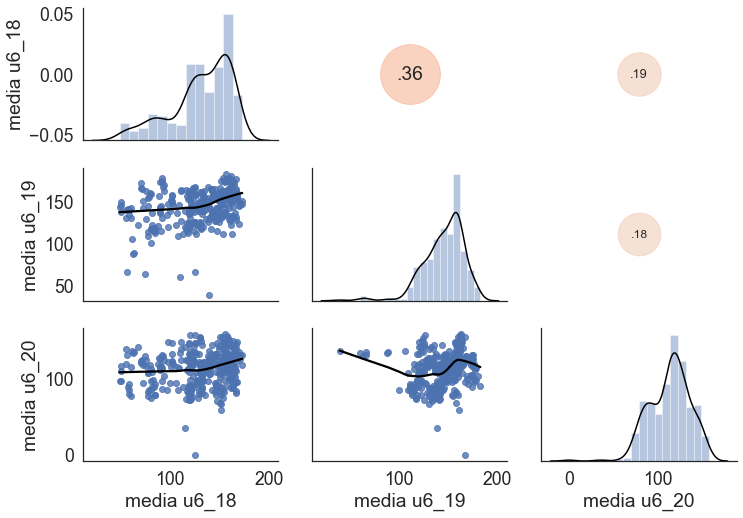

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
#iris = sns.load_dataset('iris')
g = sns.PairGrid(df_media_u6_giorno, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.savefig('correlogrammau6.svg', format='svg', bbox_inches='tight', dpi=1200)

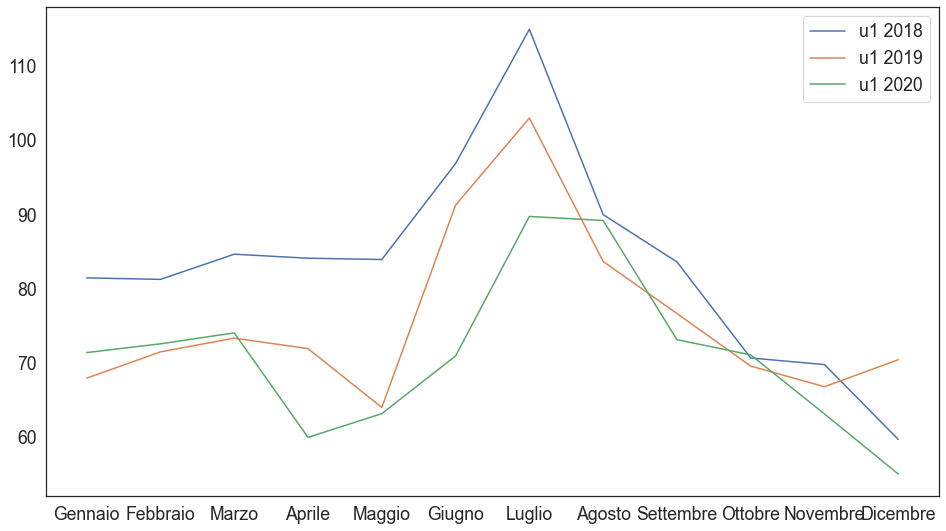

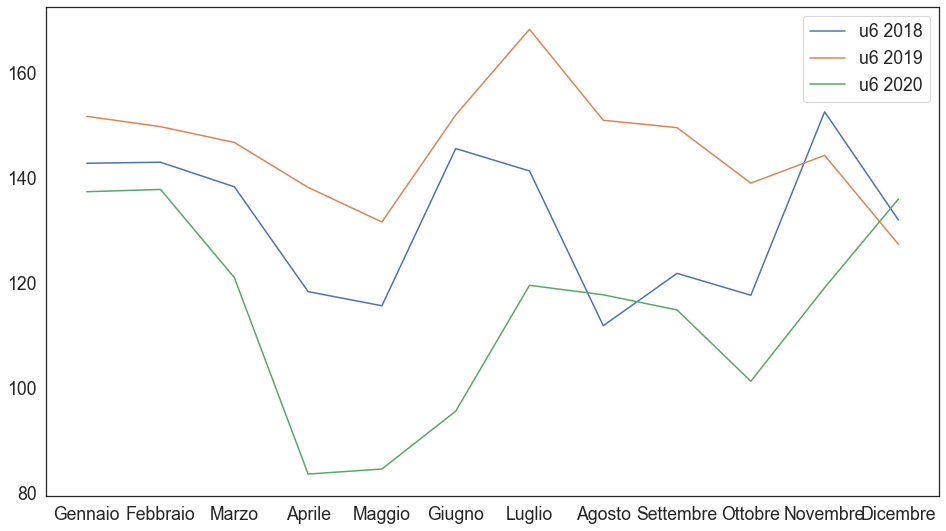

In [10]:
plt.plot(dataf18_u1["media_u1_2018"],label="u1 2018")
plt.plot(dataf19_u1["media_u1_2019"],label="u1 2019")
plt.plot(dataf20_u1["media_u1_2020"],label="u1 2020")
plt.legend()
plt.savefig('mediameseu1.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()

plt.plot(dataf18_u6["media_u6_2018"],label="u6 2018")
plt.plot(dataf19_u6["media_u6_2019"],label="u6 2019")
plt.plot(dataf20_u6["media_u6_2020"],label="u6 2020")
plt.legend()
plt.savefig('mediameseu6.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()

In [11]:
dataf18_u1=dataf18_u1.sort_values(by='media_u1_2018', ascending=False)
dataf18_u6=dataf18_u6.sort_values(by='media_u6_2018', ascending=False)
dataf19_u1=dataf19_u1.sort_values(by='media_u1_2019', ascending=False)
dataf19_u6=dataf19_u6.sort_values(by='media_u6_2019', ascending=False)
dataf20_u1=dataf20_u1.sort_values(by='media_u1_2020', ascending=False)
dataf20_u6=dataf20_u6.sort_values(by='media_u6_2020', ascending=False)

pesi=['12','11','10','9','8','7','6','5','4','3','2','1']
dataf18_u1["pesi"]=pesi
dataf18_u6["pesi"]=pesi
dataf19_u1["pesi"]=pesi
dataf19_u6["pesi"]=pesi
dataf20_u1["pesi"]=pesi
dataf20_u6["pesi"]=pesi
display(dataf18_u1,dataf18_u6)

,media_u1_2018,pesi
Luglio,114.951613,12
Giugno,96.857708,11
Agosto,89.976008,10
Marzo,84.638609,9
Aprile,84.099792,8
Maggio,83.925403,7
Settembre,83.603125,6
Gennaio,81.448992,5
Febbraio,81.245982,4
Ottobre,70.653226,3


,media_u6_2018,pesi
Novembre,152.537726,12
Giugno,145.535156,11
Febbraio,142.928385,10
Gennaio,142.734610,9
Luglio,141.269237,8
Marzo,138.250521,7
Dicembre,131.930326,6
Settembre,121.753385,5
Aprile,118.270052,4
Ottobre,117.577285,3


In [12]:
display(dataf19_u1,dataf19_u6)

,media_u1_2019,pesi
Luglio,102.988508,12
Giugno,91.250625,11
Agosto,83.662500,10
Settembre,76.644792,9
Marzo,73.329234,8
Aprile,71.914375,7
Febbraio,71.474107,6
Dicembre,70.419960,5
Ottobre,69.561290,4
Gennaio,67.934274,3


,media_u6_2019,pesi
Luglio,168.263222,12
Giugno,151.949722,11
Gennaio,151.674328,10
Agosto,150.932124,9
Febbraio,149.708036,8
Settembre,149.520174,7
Marzo,146.700672,6
Novembre,144.231007,5
Ottobre,138.947446,4
Aprile,138.130590,3


In [13]:
display(dataf20_u1,dataf20_u6)

,media_u1_2020,pesi
Luglio,89.727218,12
Agosto,89.185282,11
Marzo,74.039919,10
Settembre,73.119583,9
Febbraio,72.560776,8
Gennaio,71.382661,7
Ottobre,71.070766,6
Giugno,70.930417,5
Maggio,63.148185,4
Novembre,63.109792,3


,media_u6_2020,pesi
Febbraio,137.743786,12
Gennaio,137.310568,11
Dicembre,135.920413,10
Marzo,120.939012,9
Luglio,119.469758,8
Novembre,119.032031,7
Agosto,117.662298,6
Settembre,114.780417,5
Ottobre,101.186878,4
Giugno,95.493124,3


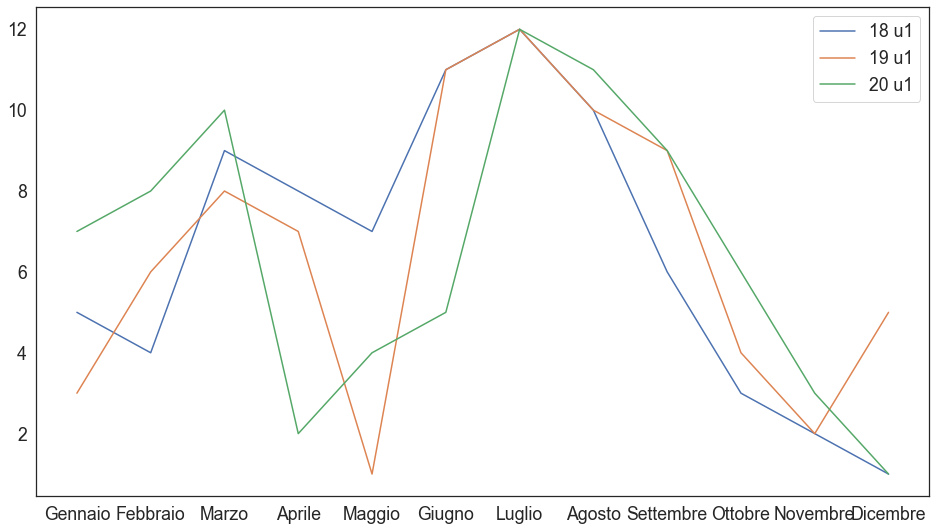

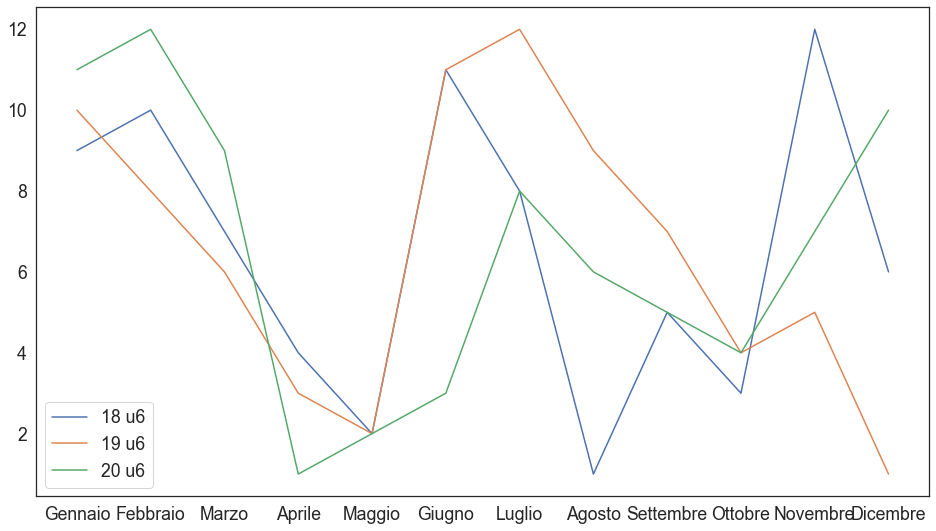

In [14]:
#print(dataf20_u1[dataf20_u1.index=="Aprile"]["pesi"])
valori18_u1=[]
valori18_u6=[]
valori19_u1=[]
valori19_u6=[]
valori20_u1=[]
valori20_u6=[]
mesi = ["Gennaio","Febbraio","Marzo","Aprile","Maggio","Giugno","Luglio","Agosto","Settembre","Ottobre","Novembre","Dicembre"]
for mese in mesi:
    valori18_u1.append(int(dataf18_u1[dataf18_u1.index==mese]["pesi"][0]))
    valori18_u6.append(int(dataf18_u1[dataf18_u6.index==mese]["pesi"][0]))
    valori19_u1.append(int(dataf19_u1[dataf19_u1.index==mese]["pesi"][0]))
    valori19_u6.append(int(dataf19_u1[dataf19_u6.index==mese]["pesi"][0]))
    valori20_u1.append(int(dataf20_u1[dataf20_u1.index==mese]["pesi"][0]))
    valori20_u6.append(int(dataf20_u1[dataf20_u6.index==mese]["pesi"][0]))

#valori_tot_u1=valori18_u1+valori19_u1+valori20_u1
plt.plot(mesi,valori18_u1,label="18 u1")
plt.plot(mesi,valori19_u1,label="19 u1")
plt.plot(mesi,valori20_u1,label="20 u1")
plt.legend()
plt.show()

plt.plot(mesi,valori18_u6,label="18 u6")
plt.plot(mesi,valori19_u6,label="19 u6")
plt.plot(mesi,valori20_u6,label="20 u6")
plt.legend()
plt.show()

valori_181920_u1=[]
valori_181920_u6=[]
valori_1819_u1=[]
valori_1819_u6=[]

cont=0
while cont<=11:
    valori_181920_u1.append(valori18_u1[cont]+valori19_u1[cont]+valori20_u1[cont])
    valori_181920_u6.append(valori18_u6[cont]+valori19_u6[cont]+valori20_u6[cont])
    valori_1819_u1.append(valori18_u1[cont]+valori19_u1[cont])
    valori_1819_u6.append(valori18_u6[cont]+valori19_u6[cont])
    cont=cont+1


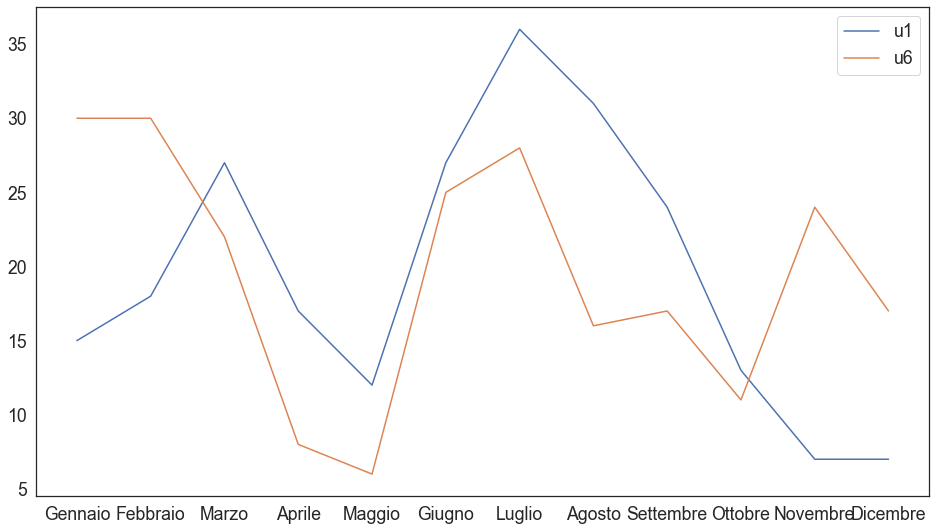

In [15]:
plt.plot(mesi,valori_181920_u1,label="u1")
plt.plot(mesi,valori_181920_u6,label="u6")
plt.legend()
plt.show()



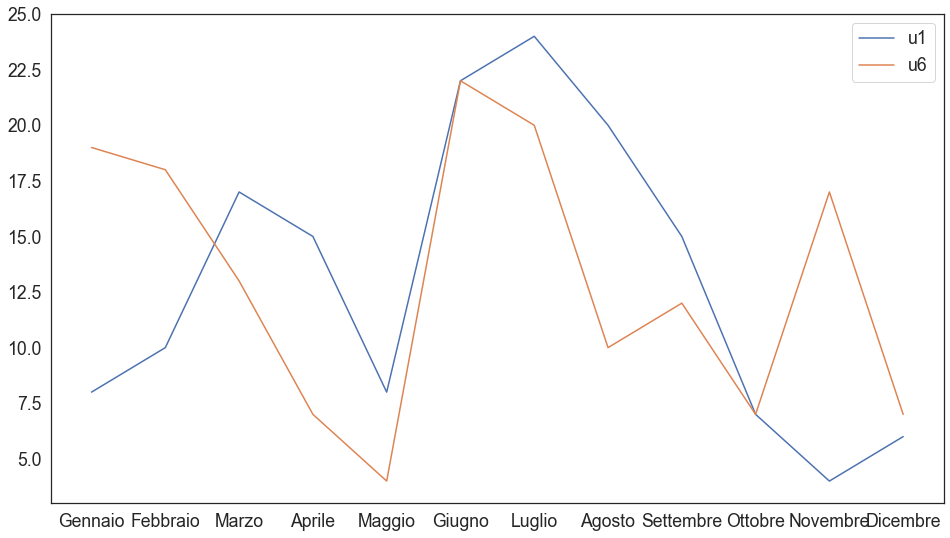

In [16]:
plt.plot(mesi,valori_1819_u1,label="u1")
plt.plot(mesi,valori_1819_u6,label="u6")
plt.legend()
plt.show()

In [17]:
#UN PO' DI STATISTICHE (annuali)
rows = []

for year in [2018,2019,2020]:
    for c in ['consumo_attiva_u1', 'consumo_attiva_u6']:
        dfy = raw_df[raw_df.index.year==year][c]
        descr = dfy.describe()
        descr['range'] = descr['max'] - descr['min']
        descr.name += '_' + str(year)
        rows.append(descr)

descr_df = pd.DataFrame(rows)
descr_df = descr_df[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']]
descr_df

,mean,std,min,25%,50%,75%,max,range
consumo_attiva_u1_2018,83.419152,19.514788,27.300,71.100000,82.3500,94.8000,150.1500,122.8500
consumo_attiva_u6_2018,131.554553,50.626304,0.000,89.890625,126.2250,177.1000,257.1250,257.1250
consumo_attiva_u1_2019,75.855514,16.908815,0.000,64.950000,71.5500,84.3000,138.4500,138.4500
consumo_attiva_u6_2019,145.706725,29.481694,21.725,122.787500,145.3375,165.4125,228.1125,206.3875
consumo_attiva_u1_2020,71.142469,15.056012,0.000,62.700000,69.9000,79.8000,129.1500,129.1500
consumo_attiva_u6_2020,113.946249,24.442849,0.000,97.027495,116.0500,128.4250,197.3125,197.3125


18/19/20 valori ogni 15 min: 



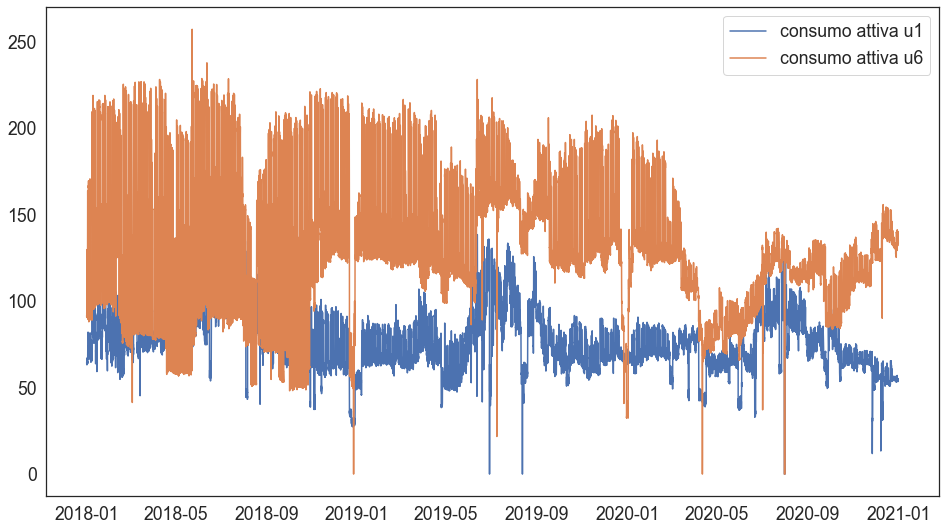

18/19/20 valori ogni ora: 



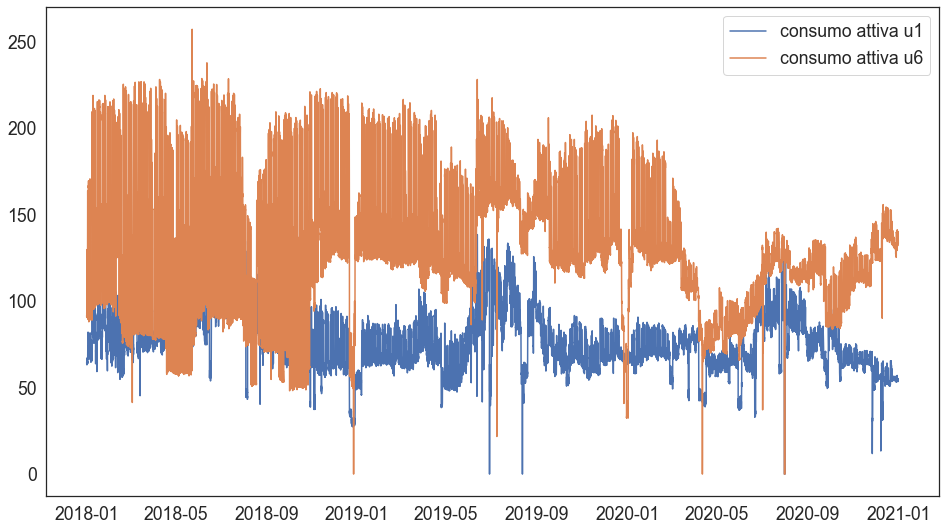

In [18]:
print("18/19/20 valori ogni 15 min: \n")
plt.plot(raw_df['consumo_attiva_u1'],label="consumo attiva u1")
plt.plot(raw_df['consumo_attiva_u6'],label="consumo attiva u6")
plt.legend()
plt.show()

print("18/19/20 valori ogni ora: \n")
plt.plot(raw_df_hour['consumo_attiva_u1'],label="consumo attiva u1")
plt.plot(raw_df_hour['consumo_attiva_u6'],label="consumo attiva u6")
plt.legend()
plt.show()



18/19/20 media giorno: 



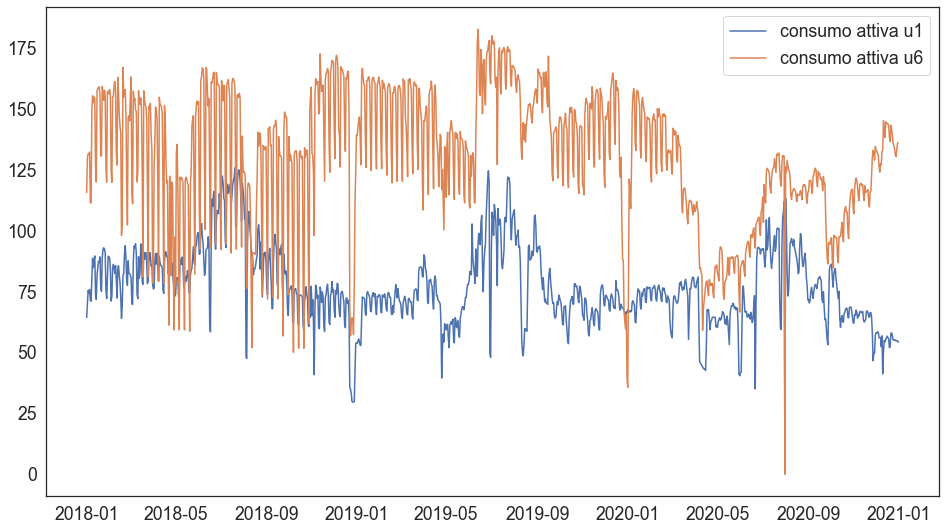

2018 media giornaliera: 



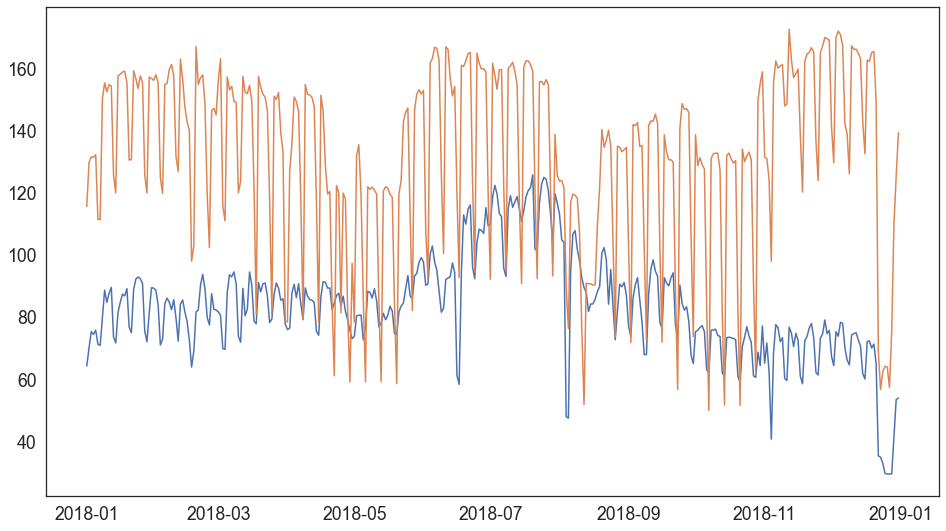

2020 media giornaliera: 



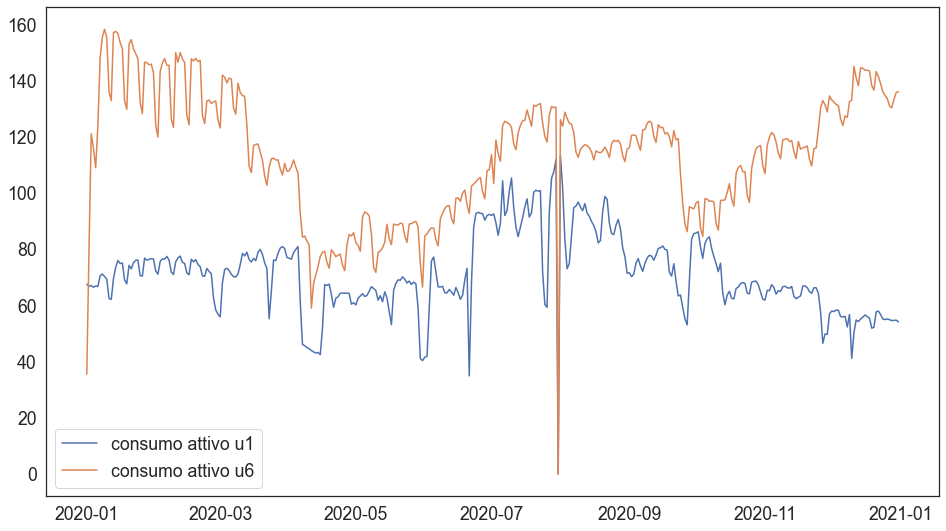

In [19]:

print("18/19/20 media giorno: \n")
plt.plot(raw_df_day['consumo_attiva_u1'],label="consumo attiva u1")
plt.plot(raw_df_day['consumo_attiva_u6'],label="consumo attiva u6")
plt.legend()
plt.savefig('mediaoraria.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()
#plt.savefig('mediaoraria.svg', format='svg', bbox_inches='tight', dpi=1200)

print("2018 media giornaliera: \n")
plt.plot(D18['consumo_attiva_u1'])
plt.plot(D18['consumo_attiva_u6'])
plt.show()

print("2020 media giornaliera: \n")
plt.plot(D20['consumo_attiva_u1'],label="consumo attivo u1")
plt.plot(D20['consumo_attiva_u6'],label="consumo attivo u6")
plt.legend()
plt.show()


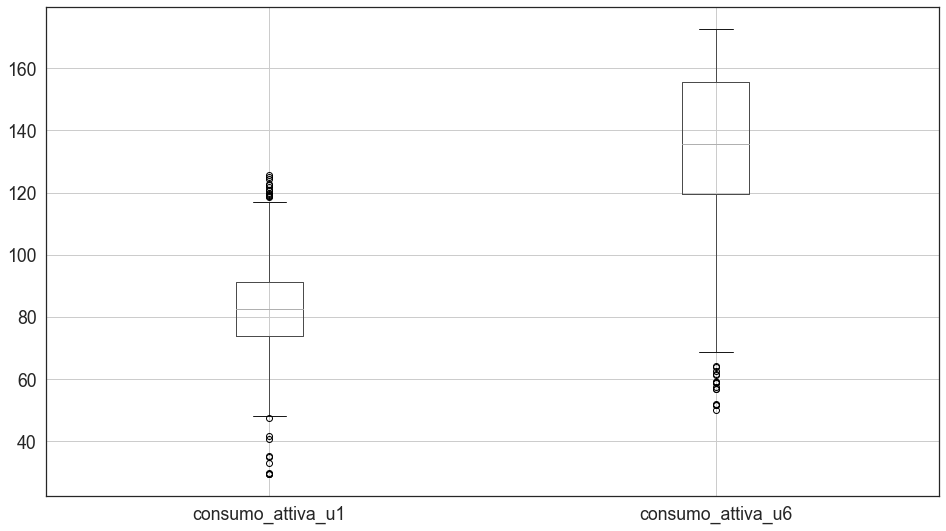

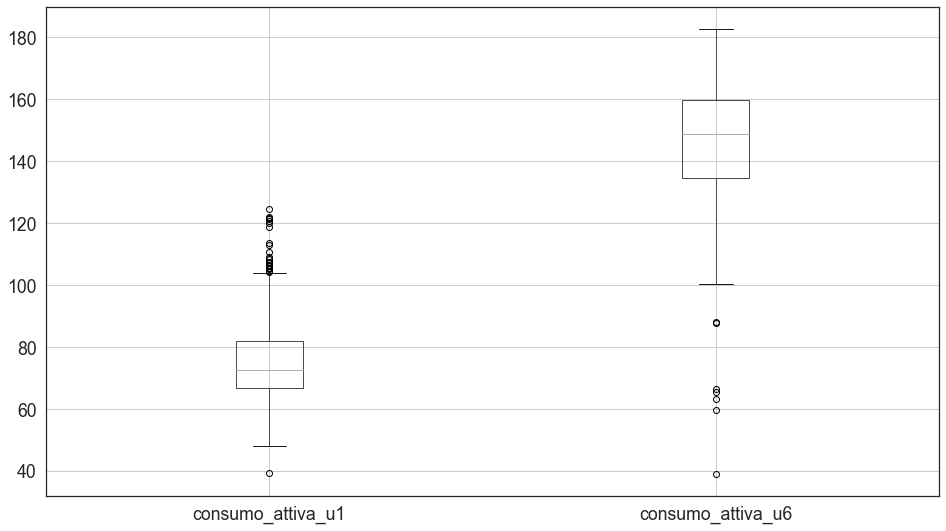

In [20]:
D18.boxplot()
plt.show()

D19.boxplot()
plt.show()

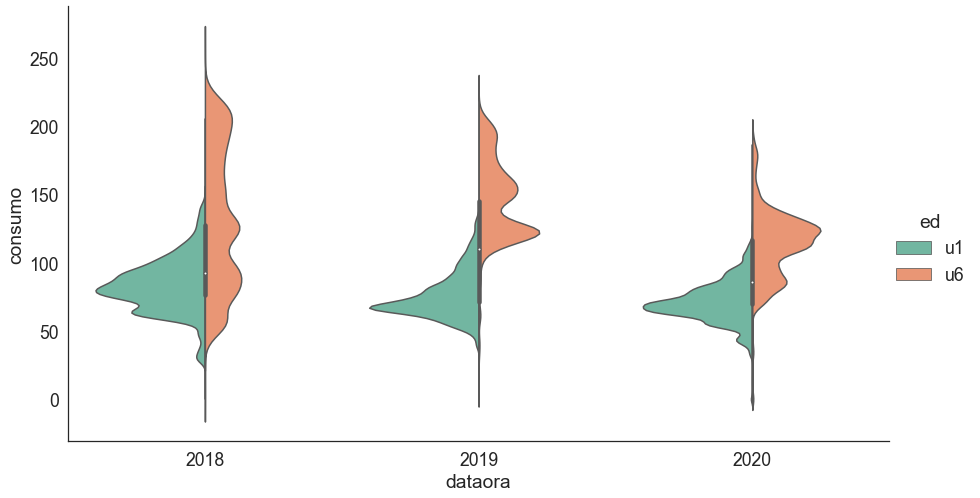

In [21]:
#violini
tmp = raw_df.copy()
tmp.index = tmp.index.year

x1 = tmp[['consumo_attiva_u1']].reset_index()
x1['ed'] = 'u1'
x1.rename(columns={'consumo_attiva_u1': 'consumo'}, inplace=True)

x6 = tmp[['consumo_attiva_u6']].reset_index()
x6['ed'] = 'u6'
x6.rename(columns={'consumo_attiva_u6': 'consumo'}, inplace=True)

tmp = pd.concat([x1,x6]).reset_index(drop=True)

ax = sns.catplot(x='dataora', y='consumo', data=tmp,
                 hue='ed', kind='violin', split=True, palette='Set2',
                 height=7, aspect=16/9)
plt.savefig('violini.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()

In [22]:
#TEST KOLMOGOROV SU_DATI (HO:distribuzioni simili) 

from scipy.stats import ks_2samp
import numpy as np
 
#np.random.seed(12345678)
x_u1 = df_media_u1_giorno["media u1_18"]
y_u1 = df_media_u1_giorno["media u1_19"]
z_u1 = df_media_u1_giorno["media u1_20"]

print("U1")
print(ks_2samp(x_u1, y_u1),"18_u1 e 19_u1")
print(ks_2samp(x_u1, z_u1),"18_u1 e 20_u1")
print(ks_2samp(y_u1, z_u1),"19_u1 e 20_u1")

x_u6 = df_media_u6_giorno["media u6_18"]
y_u6 = df_media_u6_giorno["media u6_19"]
z_u6 = df_media_u6_giorno["media u6_20"]

print("U6")
print(ks_2samp(x_u6, y_u6),"18_u6 e 19_u6")
print(ks_2samp(x_u6, z_u6),"18_u6 e 20_u6")
print(ks_2samp(y_u6, z_u6),"19_u6 e 20_u6")

print("intra U1 e U6")
print(ks_2samp(x_u1, x_u6),"18_u1 e 18_u6")
print(ks_2samp(y_u1, y_u6),"19_u1 e 19_u6")
print(ks_2samp(z_u1, z_u6),"20_u1 e 20_u6")


#Ks_2sampResult(statistic=0.022999999999999909, pvalue=0.95189016804849647)
#ks_2samp(x, z)
#Ks_2sampResult(statistic=0.41800000000000004, pvalue=3.7081494119242173e-77)

U1
KstestResult(statistic=0.33972602739726027, pvalue=4.605594702445831e-19) 18_u1 e 19_u1
KstestResult(statistic=0.39452054794520547, pvalue=9.58249576272152e-26) 18_u1 e 20_u1
KstestResult(statistic=0.1643835616438356, pvalue=0.00010092941336832217) 19_u1 e 20_u1
U6
KstestResult(statistic=0.2410958904109589, pvalue=1.0196030987164614e-09) 18_u6 e 19_u6
KstestResult(statistic=0.3643835616438356, pvalue=6.198686877983599e-22) 18_u6 e 20_u6
KstestResult(statistic=0.5945205479452055, pvalue=3.058455792902824e-60) 19_u6 e 20_u6
intra U1 e U6
KstestResult(statistic=0.7424657534246575, pvalue=2.991121331765115e-98) 18_u1 e 18_u6
KstestResult(statistic=0.9452054794520548, pvalue=7.002936076552414e-180) 19_u1 e 19_u6
KstestResult(statistic=0.7397260273972602, pvalue=2.002477017897488e-97) 20_u1 e 20_u6


In [23]:
df_media_u6_giorno

,media u6_18,media u6_19,media u6_20
0,115.614583,138.989583,35.606771
1,129.731250,141.928646,79.847396
2,131.581771,145.274479,121.166146
3,131.444271,146.672396,115.975521
4,132.263542,138.239063,109.071875
...,...,...,...
360,57.360417,66.509896,131.037500
361,75.630729,63.238542,130.367187
362,109.971354,59.686458,133.375000
363,125.388542,65.593229,135.855729


# tbatso

In [24]:
# dfcomp = pd.read_csv('tbatsed_u1_2019.csv')
# dfcomp.drop(columns=['Unnamed: 0'], inplace=True)
# dfcomp.index = raw_df.index[:len(dfcomp)]
# dfcomp.to_csv('tbatsed3.csv')

In [25]:
dfcomp18_u1 = pd.read_csv('tbatsed_u1_2018.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp19_u1 = pd.read_csv('tbatsed_u1_2019.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp20_u1 = pd.read_csv('tbatsed_u1_2020.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp18_u6 = pd.read_csv('tbatsed_u6_2018.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp19_u6 = pd.read_csv('tbatsed_u6_2019.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp20_u6= pd.read_csv('tbatsed_u6_2020.csv', parse_dates=['dataora'], index_col='dataora')
dfcomp18_u1

,observed,trend,season_daily,season_weekly,resid
dataora,,,,,
2018-01-01 00:00:00,64.50,67.739221,-7.711043,-5.560783,11.907432
2018-01-01 01:00:00,64.35,69.172376,-8.580665,-3.910840,0.778882
2018-01-01 02:00:00,64.05,70.146176,-9.012705,-2.294487,-1.633789
2018-01-01 03:00:00,63.60,70.615204,-8.766804,-0.758271,-2.323362
2018-01-01 04:00:00,64.20,70.808699,-8.300193,0.656056,-1.068871
...,...,...,...,...,...
2018-12-31 19:00:00,54.45,47.687780,-0.037075,2.054027,4.309528
2018-12-31 20:00:00,54.30,48.984350,-3.419030,1.796457,2.546593
2018-12-31 21:00:00,49.95,49.762430,-5.626026,1.649887,-3.104159


In [26]:
# tmp = dfcomp[(dfcomp.index.year==2020) & (dfcomp.index.month>=7)].copy()
#tmp = dfcomp[(dfcomp.index.year==2018) & (dfcomp.index.month>=10)].copy()
#plt.plot(tmp['season_daily'])
#plt.plot(tmp['season_weekly'])
#plt.plot(tmp['season_yearly'])
#plt.show()
#plt.plot(dfcomp['season_daily'])
#plt.plot(dfcomp['trend'])
#plt.show()

In [27]:
tmp_18_u1=(dfcomp18_u1["trend"]).resample('D').mean()
tmp_19_u1=(dfcomp19_u1["trend"]).resample('D').mean()
tmp_20_u1=(dfcomp20_u1["trend"]).resample('D').mean()
tmp_18_u6=(dfcomp18_u6["trend"]).resample('D').mean()
tmp_19_u6=(dfcomp19_u6["trend"]).resample('D').mean()
tmp_20_u6=(dfcomp20_u6["trend"]).resample('D').mean()
tmp_20_u1=pd.concat([tmp_20_u1['2020-01-01' : '2020-02-28'],tmp_20_u1['2020-03-01' : '2020-12-31']])
tmp_20_u6=pd.concat([tmp_20_u6['2020-01-01' : '2020-02-28'],tmp_20_u6['2020-03-01' : '2020-12-31']])


df_media_u1_giorno_tbatso = pd.DataFrame({'media u1_18': list(tmp_18_u1),
                   'media u1_19': list(tmp_19_u1),
                   'media u1_20': list(tmp_20_u1)})

df_media_u6_giorno_tbatso = pd.DataFrame({'media u6_18': list(tmp_18_u6),
                   'media u6_19': list(tmp_19_u6),
                   'media u6_20': list(tmp_20_u6)})

df_media_u6_giorno_tbatso

#TEST KOLMOGOROV SU TBATSO(HO:distribuzioni simili) 

from scipy.stats import ks_2samp
import numpy as np
 
#np.random.seed(12345678)
x_u1_t = df_media_u1_giorno_tbatso["media u1_18"]
y_u1_t = df_media_u1_giorno_tbatso["media u1_19"]
z_u1_t = df_media_u1_giorno_tbatso["media u1_20"]

print("U1")
print(ks_2samp(x_u1_t, y_u1_t),"18_u1 e 19_u1")
print(ks_2samp(x_u1_t, z_u1_t),"18_u1 e 20_u1")
print(ks_2samp(y_u1_t, z_u1_t),"19_u1 e 20_u1")

x_u6_t = df_media_u6_giorno_tbatso["media u6_18"]
y_u6_t = df_media_u6_giorno_tbatso["media u6_19"]
z_u6_t = df_media_u6_giorno_tbatso["media u6_20"]

print("U6")
print(ks_2samp(x_u6_t, y_u6_t),"18_u6 e 19_u6")
print(ks_2samp(x_u6_t, z_u6_t),"18_u6 e 20_u6")
print(ks_2samp(y_u6_t, z_u6_t),"19_u6 e 20_u6")

print("intra U1 e U6")
print(ks_2samp(x_u1_t, x_u6_t),"18_u1 e 18_u6")
print(ks_2samp(y_u1_t, y_u6_t),"19_u1 e 19_u6")
print(ks_2samp(z_u1_t, z_u6_t),"20_u1 e 20_u6")


U1
KstestResult(statistic=0.3726027397260274, pvalue=6.112504949853904e-23) 18_u1 e 19_u1
KstestResult(statistic=0.4575342465753425, pvalue=7.963004203098471e-35) 18_u1 e 20_u1
KstestResult(statistic=0.21095890410958903, pvalue=1.5959444520650525e-07) 19_u1 e 20_u1
U6
KstestResult(statistic=0.3232876712328767, pvalue=2.8586245432606456e-17) 18_u6 e 19_u6
KstestResult(statistic=0.3643835616438356, pvalue=6.198686877983599e-22) 18_u6 e 20_u6
KstestResult(statistic=0.6767123287671233, pvalue=8.583856544548878e-80) 19_u6 e 20_u6
intra U1 e U6
KstestResult(statistic=0.8356164383561644, pvalue=7.504973519964262e-130) 18_u1 e 18_u6
KstestResult(statistic=0.9643835616438357, pvalue=2.892337089957864e-191) 19_u1 e 19_u6
KstestResult(statistic=0.7780821917808219, pvalue=1.747229861485352e-109) 20_u1 e 20_u6


In [28]:
#MEDIA SETTIMANALE
df20_w=df20.resample('W').mean()
# df18_w.sort_values(by='consumo_attiva_u1', ascending=False)
(df20_w[["consumo_attiva_u6"]]).sort_values(by='consumo_attiva_u6', ascending=False)

# plt.plot(df18[df18.index.month==7]['consumo_attiva_u1'])

,consumo_attiva_u6
dataora,
2020-01-19,148.500818
2020-01-26,145.331771
2020-01-12,144.371726
2020-12-20,142.165997
2020-02-16,141.872173
2020-02-23,141.375372
2020-02-09,139.767113
2020-02-02,138.810342
2020-03-08,137.511458


settimana 24-12-18 / 39-12-18


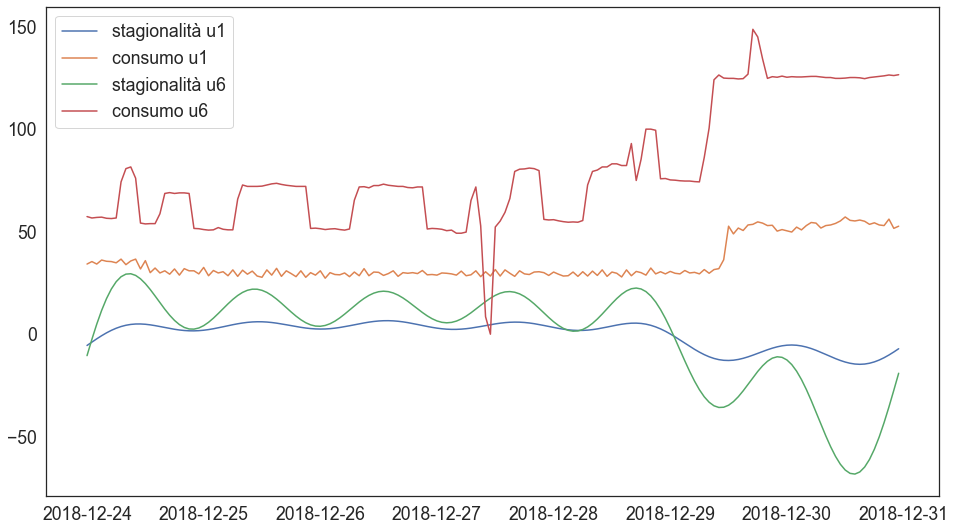

settimana 1 agosto


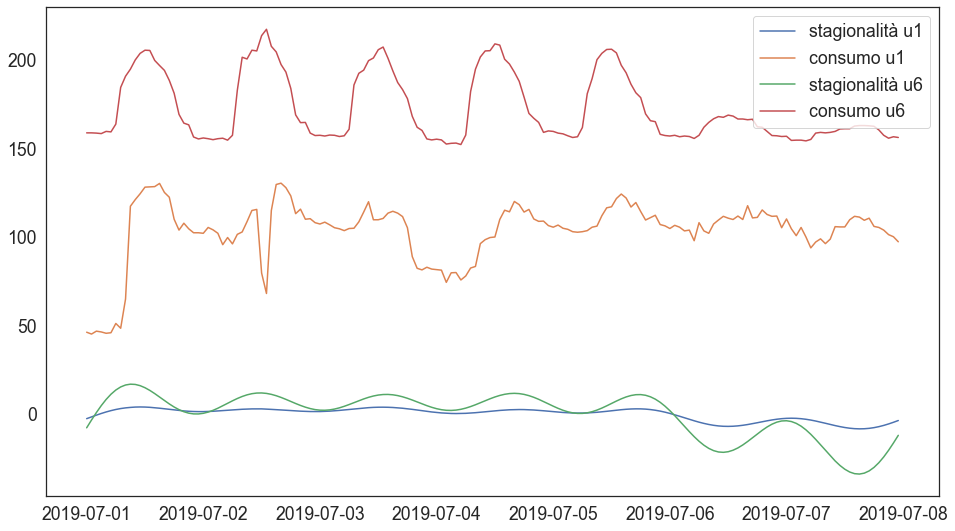

In [29]:
print("settimana 24-12-18 / 39-12-18")
plt.plot(dfcomp18_u1['2018-12-24' : '2018-12-30']['season_weekly'],label="stagionalità u1")
plt.plot(H18['2018-12-24' : '2018-12-30']['consumo_attiva_u1'],label="consumo u1")
plt.plot(dfcomp18_u6['2018-12-24' : '2018-12-30']['season_weekly'],label="stagionalità u6")
plt.plot(H18['2018-12-24' : '2018-12-30']['consumo_attiva_u6'],label="consumo u6")
plt.legend()
plt.show()

print("settimana 1 agosto")
plt.plot(dfcomp19_u1['2019-07-01' : '2019-07-07']['season_weekly'],label="stagionalità u1")
plt.plot(H19['2019-07-01' : '2019-07-07']['consumo_attiva_u1'],label="consumo u1")
plt.plot(dfcomp19_u6['2019-07-01' : '2019-07-07']['season_weekly'],label="stagionalità u6")
plt.plot(H19['2019-07-01' : '2019-07-07']['consumo_attiva_u6'],label="consumo u6")
plt.legend()
plt.show()



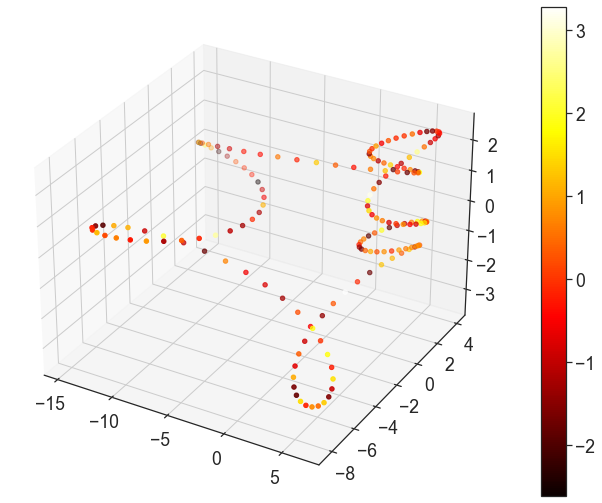

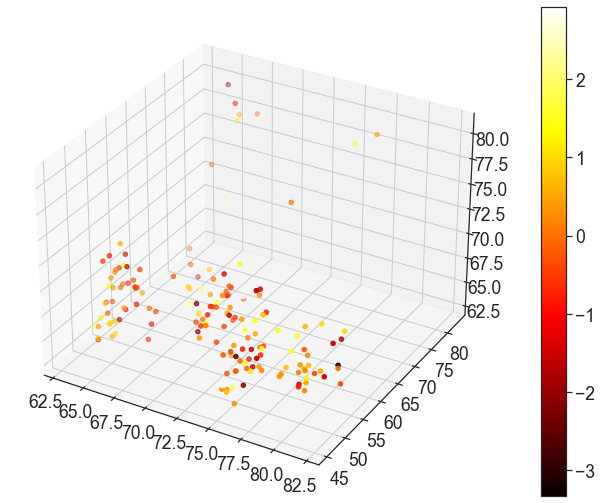

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dfcomp18_u1['2018-01-01' : '2018-01-07']['season_weekly']
y = dfcomp19_u1['2019-01-01' : '2019-01-07']['season_weekly']
z = dfcomp20_u1['2020-01-01' : '2020-01-07']['season_weekly']
c = np.random.standard_normal(168)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#x = dfcomp18_u1['2018-06-01' : '2018-06-07']['season_weekly']
#y = dfcomp19_u1['2019-06-01' : '2019-06-07']['season_weekly']
#z = dfcomp20_u1['2020-06-01' : '2020-06-07']['season_weekly']
x=H18['2018-01-01' : '2018-01-07']['consumo_attiva_u1']
y=H19['2019-01-01' : '2019-01-07']['consumo_attiva_u1']
z=H20['2020-01-01' : '2020-01-07']['consumo_attiva_u1']
c = np.random.standard_normal(168)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [31]:
#x = 4
#lower = dfcomp['resid'].mean() - x * dfcomp['resid'].std()
#upper = dfcomp['resid'].mean() + x * dfcomp['resid'].std()

#plt.figure(figsize=(16,9))
#plt.plot(dfcomp['resid'])
#plt.hlines(lower, '2018-01-01', '2020-12-31', color='red', linestyle='dashed')
#plt.hlines(upper, '2018-01-01', '2020-12-31', color='red', linestyle='dashed')
#plt.show()

In [32]:
#anomalies = dfcomp.sort_values(by='resid', ascending=False)
#anomalies = anomalies[anomalies['resid']>upper]
#anomalies

In [33]:
# plt.rcParams["figure.figsize"] = (16,9)
# fig, axs = plt.subplots(2, 2)

# freq = pd.DataFrame(list(anomalies.index.year), columns=['year'])
# sns.countplot(x='year',data=freq, ax=axs[0, 0])

# freq = pd.DataFrame(list(anomalies.index.month), columns=['month'])
# sns.countplot(x='month',data=freq, ax=axs[0, 1])

# freq = pd.DataFrame(list(anomalies.index.dayofweek), columns=['dayofweek'])
# sns.countplot(x='dayofweek',data=freq, ax=axs[1, 0])

# freq = pd.DataFrame(list(anomalies.index.hour), columns=['hour'])
# sns.countplot(x='hour',data=freq, ax=axs[1, 1])

# plt.show()

In [34]:
# ystart = 2018
# yend = 2020

# plt.figure(figsize=(30,9))
# plt.plot(dfcomp['observed'])
#  plt.xlim(datetime(start,1,1), datetime(yend+1,1,1))

# plt.scatter(anomalies.index, anomalies['observed'], color='r', marker='D')
# plt.xlim(datetime(ystart,1,1), datetime(yend+1,1,1))

In [35]:
# anomalies.head(10)

settimana 1 agosto


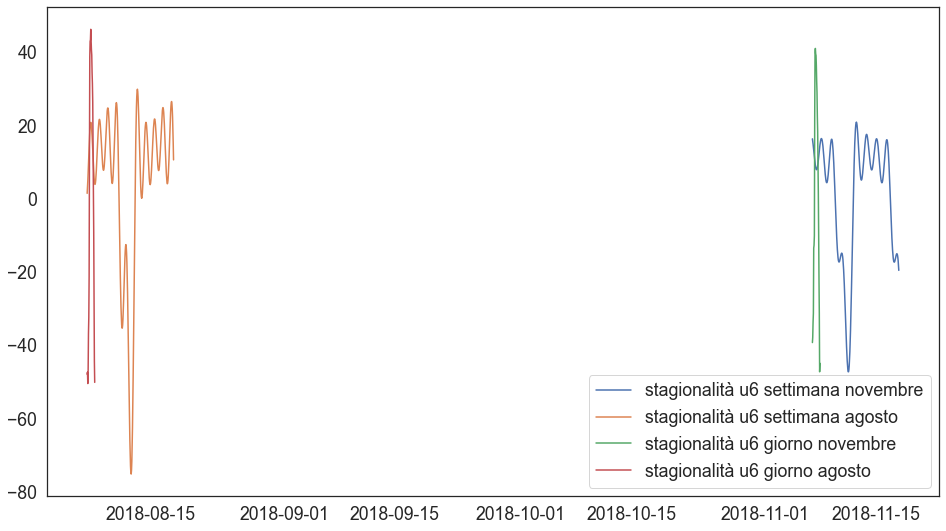

In [36]:
prova = pd.read_csv('tbatsed_2020-09-01_u1.csv')
u6_tbatsed = pd.read_csv('tbats_u6.csv', parse_dates=['dataora'], index_col='dataora')

print("settimana 1 agosto")
plt.plot(u6_tbatsed['2018-11-07' : '2018-11-17']['season_weekly'],label="stagionalità u6 settimana novembre")
plt.plot(u6_tbatsed['2018-08-07' : '2018-08-17']['season_weekly'],label="stagionalità u6 settimana agosto")
plt.plot(u6_tbatsed['2018-11-07' : '2018-11-07']['season_daily'],label="stagionalità u6 giorno novembre")
plt.plot(u6_tbatsed['2018-08-07' : '2018-08-07']['season_daily'],label="stagionalità u6 giorno agosto")
plt.legend()
plt.show()

In [37]:
#--------------------------------

# Anomalie

In [38]:
anomalie_u1 = pd.read_csv('anomalie_u1.csv', parse_dates=['dataora'], index_col='dataora')
anomalie_u6 = pd.read_csv('anomalie_u6.csv', parse_dates=['dataora'], index_col='dataora')
#u6_tbatsed = pd.read_csv('tbats_u6_semesters_magic.csv', parse_dates=['dataora'], index_col='dataora')
print(anomalie_u1)
cont=1

while cont<=12:
    print(len(anomalie_u1[anomalie_u1.index.month==cont]))
    cont=cont+1
    

                     consumo_attiva
dataora                            
2018-01-01 00:00:00           64.50
2018-01-02 21:00:00           82.05
2018-01-03 22:00:00           76.65
2018-01-05 22:00:00           81.30
2018-02-07 11:00:00           94.50
...                             ...
2020-09-29 11:00:00           98.55
2020-11-26 21:00:00           33.30
2020-11-27 10:00:00           57.45
2020-12-08 10:00:00           57.90
2020-12-11 09:00:00           61.95

[111 rows x 1 columns]
5
7
7
3
9
24
18
11
7
6
10
4


In [39]:
print(anomalie_u6)
cont=1

while cont<=12:
    print(len(anomalie_u6[anomalie_u6.index.month==cont]))
    cont=cont+1
    

                     consumo_attiva
dataora                            
2018-01-01 00:00:00         91.7125
2018-02-08 09:00:00        198.9625
2018-02-16 06:00:00        131.3125
2018-02-18 17:00:00        108.4875
2018-02-19 08:00:00        208.5875
...                             ...
2019-04-09 07:00:00        168.0250
2019-04-15 07:00:00        162.5250
2019-07-09 07:00:00         96.3875
2020-04-11 14:00:00         72.0500
2020-07-01 20:00:00         81.4000

[133 rows x 1 columns]
1
6
12
16
24
19
20
8
17
7
0
3


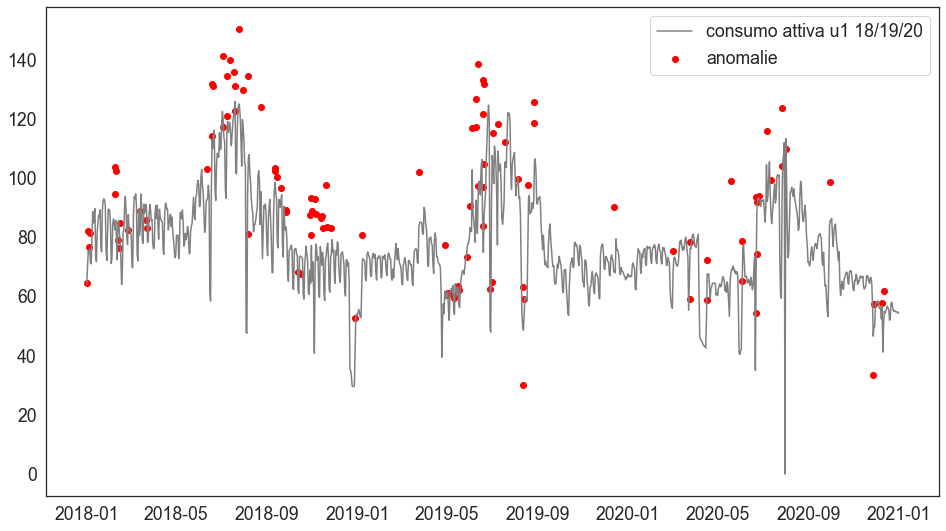

In [40]:
plt.plot(raw_df_day['consumo_attiva_u1'],label="consumo attiva u1 18/19/20",color="grey")
#sns.scatterplot(data=raw_df_day['consumo_attiva_u6'])
plt.scatter(anomalie_u1.index,anomalie_u1["consumo_attiva"],color="red",label="anomalie")
plt.legend()
plt.savefig('anomalie_u1.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()

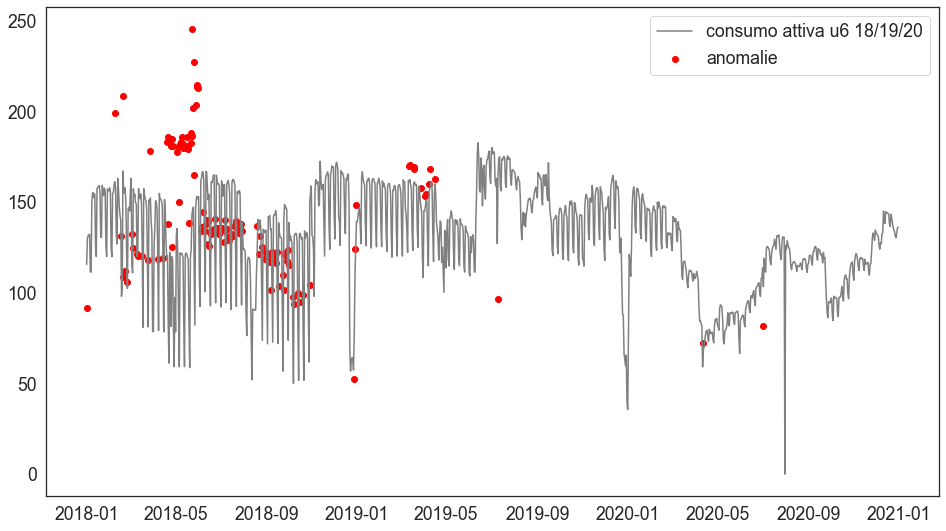

In [41]:
plt.plot(raw_df_day['consumo_attiva_u6'],label="consumo attiva u6 18/19/20",color="grey")
#sns.scatterplot(data=raw_df_day['consumo_attiva_u6'])
plt.scatter(anomalie_u6.index,anomalie_u6["consumo_attiva"],color="red",label="anomalie")
plt.legend()
plt.savefig('anomalie_u6.svg', format='svg', bbox_inches='tight', dpi=1200)
plt.show()

In [42]:
raw_df_hour

,consumo_attiva_u1,consumo_attiva_u6
dataora,,
2018-01-01 00:00:00,64.50,91.7125
2018-01-01 01:00:00,64.35,91.1625
2018-01-01 02:00:00,64.05,90.7500
2018-01-01 03:00:00,63.60,93.5000
2018-01-01 04:00:00,64.20,123.6125
...,...,...
2020-12-31 19:00:00,53.55,137.3625
2020-12-31 20:00:00,54.15,138.0500
2020-12-31 21:00:00,54.30,136.8125


settimana 24-12-18 / 39-12-18


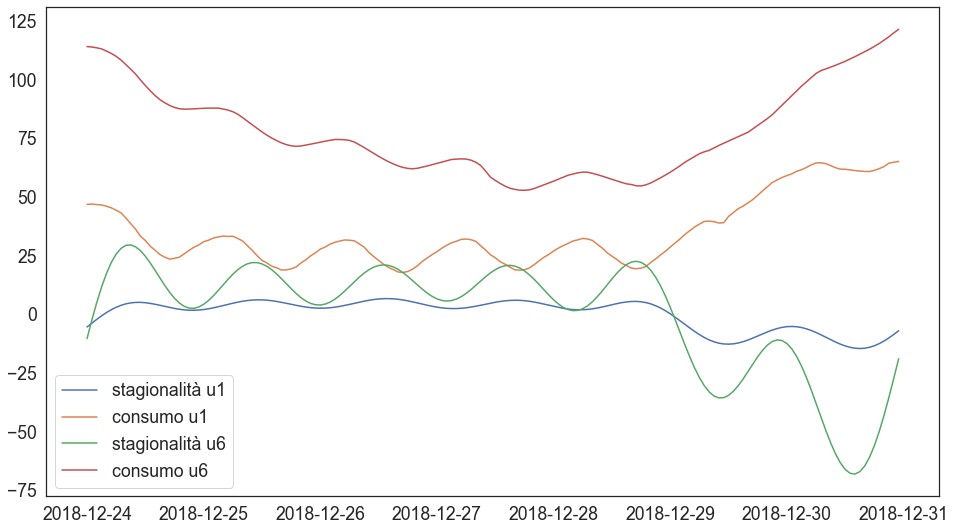

settimana 1 agosto


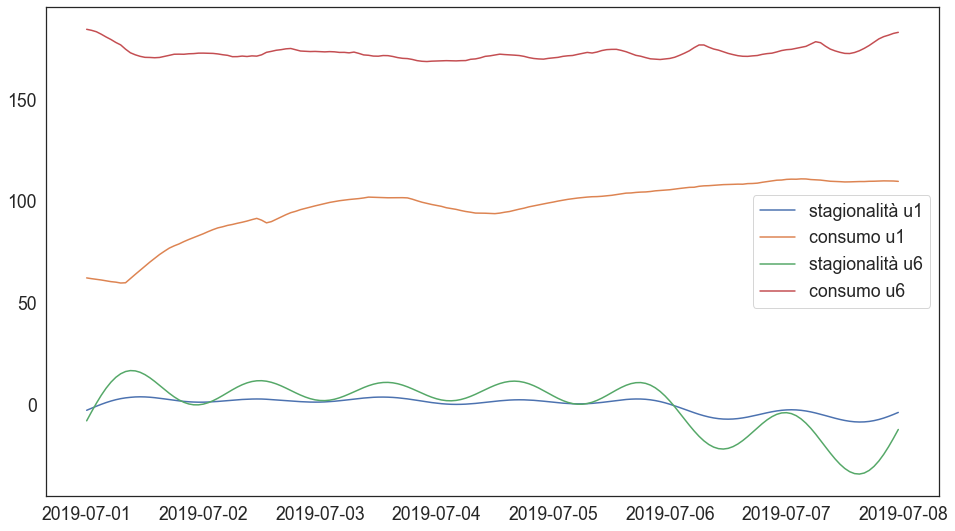

In [43]:
print("settimana 24-12-18 / 39-12-18")
plt.plot(dfcomp18_u1['2018-12-24' : '2018-12-30']['season_weekly'],label="stagionalità u1")
plt.plot(dfcomp18_u1['2018-12-24' : '2018-12-30']['trend'],label="consumo u1")
plt.plot(dfcomp18_u6['2018-12-24' : '2018-12-30']['season_weekly'],label="stagionalità u6")
plt.plot(dfcomp18_u6['2018-12-24' : '2018-12-30']['trend'],label="consumo u6")
plt.legend()
plt.show()

print("settimana 1 agosto")
plt.plot(dfcomp19_u1['2019-07-01' : '2019-07-07']['season_weekly'],label="stagionalità u1")
plt.plot(dfcomp19_u1['2019-07-01' : '2019-07-07']['trend'],label="consumo u1")
plt.plot(dfcomp19_u6['2019-07-01' : '2019-07-07']['season_weekly'],label="stagionalità u6")
plt.plot(dfcomp19_u6['2019-07-01' : '2019-07-07']['trend'],label="consumo u6")
plt.legend()
plt.show()



